# DMW mini project : 
<img src="Images/db.jpg" width="100%">

In [44]:
# to supress warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# for confusion matrix
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [2]:
import numpy as np
import pandas as pd

### Read the dataset

In [3]:
df_pima=pd.read_csv('./Datasets/diabetes.csv')
df_pima.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df_pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Option One : Start Machine Learning on RAW Data 

### Selecting Features 

In [5]:
X = pd.DataFrame(data = df_pima, columns = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"])

y = pd.DataFrame(data = df_pima, columns = ["Outcome"])

## Option Two : Perform Data Pre-processing 

In [ ]:
df_pima.isnull().sum()

In [ ]:
df_pima.head(20)

### Replacing 0's with NaNs

In [4]:
df_pima['Glucose'] = df_pima['Glucose'].replace(0, np.nan)
df_pima['BloodPressure'] = df_pima['BloodPressure'].replace(0, np.nan) 
df_pima['SkinThickness'] = df_pima['SkinThickness'].replace(0, np.nan) 
df_pima['Insulin'] = df_pima['Insulin'].replace(0, np.nan)        
df_pima['BMI'] = df_pima['BMI'].replace(0, np.nan) 
df_pima['DiabetesPedigreeFunction'] = df_pima['DiabetesPedigreeFunction'].replace(0, np.nan) 
df_pima['Age'] = df_pima['Age'].replace(0, np.nan) 


In [ ]:
df_pima.head(10)

In [ ]:
df_pima.info()

### Replacing NaNs with mean value  

In [5]:
df_pima['BMI'].fillna(df_pima['BMI'].mean(), inplace=True)
df_pima['Glucose'].fillna(df_pima['Glucose'].mean(), inplace=True)
df_pima['BloodPressure'].fillna(df_pima['BloodPressure'].mean(), inplace=True)
df_pima['SkinThickness'].fillna(df_pima['SkinThickness'].mean(), inplace=True)
df_pima['Insulin'].fillna(df_pima['Insulin'].mean(), inplace=True)

In [6]:
df_pima.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.00000,155.548223,33.600000,0.627,50,1
1,1,85.0,66.000000,29.00000,155.548223,26.600000,0.351,31,0
2,8,183.0,64.000000,29.15342,155.548223,23.300000,0.672,32,1
3,1,89.0,66.000000,23.00000,94.000000,28.100000,0.167,21,0
4,0,137.0,40.000000,35.00000,168.000000,43.100000,2.288,33,1
5,5,116.0,74.000000,29.15342,155.548223,25.600000,0.201,30,0
6,3,78.0,50.000000,32.00000,88.000000,31.000000,0.248,26,1
7,10,115.0,72.405184,29.15342,155.548223,35.300000,0.134,29,0
8,2,197.0,70.000000,45.00000,543.000000,30.500000,0.158,53,1
9,8,125.0,96.000000,29.15342,155.548223,32.457464,0.232,54,1


# Option Three :  Feature Engineering 

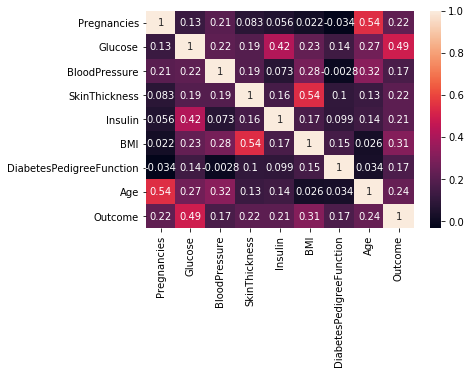

In [43]:
corr = df_pima[df_pima.columns].corr()
sns.heatmap(corr, annot = True)

### Selecting Features 

In [8]:
X = pd.DataFrame(data = df_pima, columns = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"])
#X = pd.DataFrame(data = df_pima, columns = ["Pregnancies","Glucose","SkinThickness","BMI","Age"])
y = pd.DataFrame(data = df_pima, columns = ["Outcome"])

# Option Four : Data Scaling 

In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.63994726,  0.86510807, -0.03351824, ...,  0.16629174,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20616153, -0.52985903, ..., -0.85253118,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.0158134 , -0.69530596, ..., -1.33283341,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.0225789 , -0.03351824, ..., -0.91074963,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14180757, -1.02619983, ..., -0.34311972,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94314317, -0.19896517, ..., -0.29945588,
        -0.47378505, -0.87137393]])

### Split Data into Training & Testing

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=0)

# Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
model = LogisticRegression(C=0.1,penalty='l2')

#model = LogisticRegression(C=0.1,penalty='l1')
model = LogisticRegression()

In [47]:
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

In [14]:
model.score(X_test,y_test)

0.7619047619047619

In [45]:
actual = y_test
predict = model.predict(X_test)
result = confusion_matrix(actual , predict)
print('confusion matrix => \n',result)
print('\nAccuracy score => ',accuracy_score(actual , predict))
print('Classification report => \n',classification_report(actual,predict))

confusion matrix => 
 [[136  21]
 [ 33  41]]

Accuracy score =>  0.7662337662337663
Classification report => 
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       157
           1       0.66      0.55      0.60        74

    accuracy                           0.77       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.76      0.77      0.76       231



# Naive Bayes

In [48]:
from sklearn.naive_bayes import GaussianNB
NBmodel = GaussianNB()
NBmodel.fit(X_train , y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [16]:
NBmodel.score(X_test , y_test)

0.7575757575757576

In [36]:
actual_naive = y_test
predict_naive = model.predict(X_test)
result_naive = confusion_matrix(actual_naive , predict_naive)
print('confusion matrix => \n',result_naive)
print('\nAccuracy score => ',accuracy_score(actual_naive , predict_naive))
print('Classification report => \n',classification_report(actual_naive,predict_naive))

confusion matrix => 
 [[136  21]
 [ 33  41]]

Accuracy score =>  0.7662337662337663
Classification report => 
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       157
           1       0.66      0.55      0.60        74

    accuracy                           0.77       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.76      0.77      0.76       231



# Decision Trees 

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
model = DecisionTreeClassifier(criterion='gini')
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [19]:
model.score(X_test , y_test)

0.7316017316017316

In [37]:
actual_DT = y_test
predict_DT = model.predict(X_test)
result_DT = confusion_matrix(actual_DT , predict_DT)
print('confusion matrix => \n',result_DT)
print('\nAccuracy score => ',accuracy_score(actual_DT , predict_DT))
print('Classification report => \n',classification_report(actual_DT,predict_DT))

confusion matrix => 
 [[136  21]
 [ 33  41]]

Accuracy score =>  0.7662337662337663
Classification report => 
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       157
           1       0.66      0.55      0.60        74

    accuracy                           0.77       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.76      0.77      0.76       231



# Support Vector Machine  

In [20]:
from sklearn.svm import SVC

In [21]:
SVMmodel = SVC(C=0.3,kernel='rbf',gamma=0.43)

In [22]:
model.fit(X_train , y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [23]:
model.score(X_test , y_test)

0.7532467532467533

In [38]:
actual_svm = y_test
predict_svm = model.predict(X_test)
result_svm = confusion_matrix(actual_svm , predict_svm)
print('confusion matrix => \n',result_svm)
print('\nAccuracy score => ',accuracy_score(actual_svm , predict_svm))
print('Classification report => \n',classification_report(actual_svm,predict_svm))

confusion matrix => 
 [[136  21]
 [ 33  41]]

Accuracy score =>  0.7662337662337663
Classification report => 
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       157
           1       0.66      0.55      0.60        74

    accuracy                           0.77       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.76      0.77      0.76       231



### KNN Algorithm

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
model = KNeighborsClassifier(n_neighbors=13,)

In [50]:
model.fit(X_train , y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [27]:
model.score(X_test,y_test)

0.7662337662337663

In [39]:
actual_knn = y_test
predict_knn = model.predict(X_test)
result_knn = confusion_matrix(actual_knn , predict_knn)
print('confusion matrix => \n',result_knn)
print('\nAccuracy score => ',accuracy_score(actual_knn , predict_knn))
print('Classification report => \n',classification_report(actual_knn,predict_knn))

confusion matrix => 
 [[136  21]
 [ 33  41]]

Accuracy score =>  0.7662337662337663
Classification report => 
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       157
           1       0.66      0.55      0.60        74

    accuracy                           0.77       231
   macro avg       0.73      0.71      0.72       231
weighted avg       0.76      0.77      0.76       231

